In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import sys
sys.path.insert(0, '/home/bettyld/PJ/Documents/NLP_PJ/nlp_recommend')

from nlp_recommend.utils.load_data import LoadData
# corpus = LoadData(random=True, max_prcs=6, char_max=15)
corpus = LoadData(cache=True, dataset='psychology')
corpus_philo = LoadData(cache=True, dataset='philosophy')
corpus.corpus_df = corpus.corpus_df.append(corpus_philo.corpus_df)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bettyld/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/bettyld/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bettyld/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/home/bettyld/PJ/Documents/NLP_PJ/env/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
corpus.corpus_df

,index,title,author,sentence,clean_sentence,tok_lem_sentence
level_0,,,,,,
523,523,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,For every little boy the father gets in the way,for every little boy the father gets in the way,"[every, little, boy, father, get, way]"
524,524,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,For every little girl the mother gets in the way,for every little girl the mother gets in the way,"[every, little, girl, mother, get, way]"
525,525,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,At one time or other there is likely to be a' ...,at one time or other there is likely to be a p...,"[one, time, likely, period, resented, violence..."
526,526,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,It is likely to be very soon repressed and suc...,it is likely to be very soon repressed and suc...,"[likely, soon, repressed, succeeded, real, aff..."
528,528,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,Jealousy is very often united with the natural...,jealousy is very often united with the natural...,"[jealousy, often, united, natural, rebellion, ..."
...,...,...,...,...,...,...
164957,74767,Phaedrus,Plato,A thing not difficult to understand; the laws ...,a thing not difficult to understand the laws w...,"[thing, difficult, understand, law, already, e..."
164958,113507,"Literary and Philosophical Essays: French, Ger...",Kant,And looke how my humours or conceites present ...,and looke how my humours or conceites present ...,"[looke, humour, conceites, present, shuffle]"
164960,145853,On Liberty,Mill,For if he who does not believe in a future sta...,for if he who does not believe in a future sta...,"[believe, future, state, necessarily, lie, fol..."


In [4]:
sorted(corpus.corpus_df['author'].unique())

['Abercrombie',
 'Aristotle',
 'Bergson',
 'Berkeley',
 'Butler',
 'Call',
 'Cameron',
 'Carroll',
 'Church',
 'Cousin',
 'Dasgupta',
 'Descartes',
 'Dewey',
 'Dubnow',
 'Faguet',
 'Freud',
 'Fullerton',
 'Gross',
 'Grote',
 'Gunn',
 'Hall',
 'Healy',
 'Hume',
 'Jackson',
 'James',
 'Jones',
 'Jordan',
 'Kant',
 'Kent',
 'Le Bon',
 'Le Roy',
 'Locke',
 'Mackay',
 'Marshall',
 'Mill',
 'Moisa',
 'Morley',
 'Münsterberg',
 'Nietzsche',
 'Nukariya',
 'Parker',
 'Partridge',
 'Patrick',
 'Plato',
 'Porter',
 'Pound',
 'Pyle',
 'Rashdall',
 'Romanes',
 'Russell',
 'Santayana',
 'Schiller',
 'Spinoza',
 'Stephen',
 'Stock',
 'Taylor',
 'Vaknin',
 'Various']

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(sorted(corpus.corpus_df['author'].unique()))
corpus.corpus_df['labels'] = corpus.corpus_df['author'].apply(lambda x: le.transform([x])[0])
corpus.corpus_df

,index,title,author,sentence,clean_sentence,tok_lem_sentence,labels
level_0,,,,,,,
523,523,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,For every little boy the father gets in the way,for every little boy the father gets in the way,"[every, little, boy, father, get, way]",23
524,524,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,For every little girl the mother gets in the way,for every little girl the mother gets in the way,"[every, little, girl, mother, get, way]",23
525,525,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,At one time or other there is likely to be a' ...,at one time or other there is likely to be a p...,"[one, time, likely, period, resented, violence...",23
526,526,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,It is likely to be very soon repressed and suc...,it is likely to be very soon repressed and suc...,"[likely, soon, repressed, succeeded, real, aff...",23
528,528,Outwitting Our Nerves: A Primer of Psychotherapy,Jackson,Jealousy is very often united with the natural...,jealousy is very often united with the natural...,"[jealousy, often, united, natural, rebellion, ...",23
...,...,...,...,...,...,...,...
164957,74767,Phaedrus,Plato,A thing not difficult to understand; the laws ...,a thing not difficult to understand the laws w...,"[thing, difficult, understand, law, already, e...",43
164958,113507,"Literary and Philosophical Essays: French, Ger...",Kant,And looke how my humours or conceites present ...,and looke how my humours or conceites present ...,"[looke, humour, conceites, present, shuffle]",27
164960,145853,On Liberty,Mill,For if he who does not believe in a future sta...,for if he who does not believe in a future sta...,"[believe, future, state, necessarily, lie, fol...",34


[]

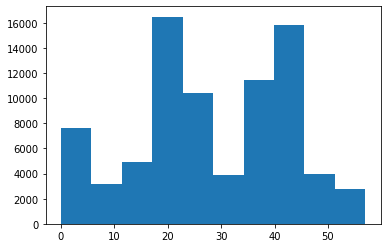

In [6]:
import matplotlib.pyplot as plt

# Max string lenght

plt.hist(corpus.corpus_df['labels'])
plt.plot()


<AxesSubplot:>

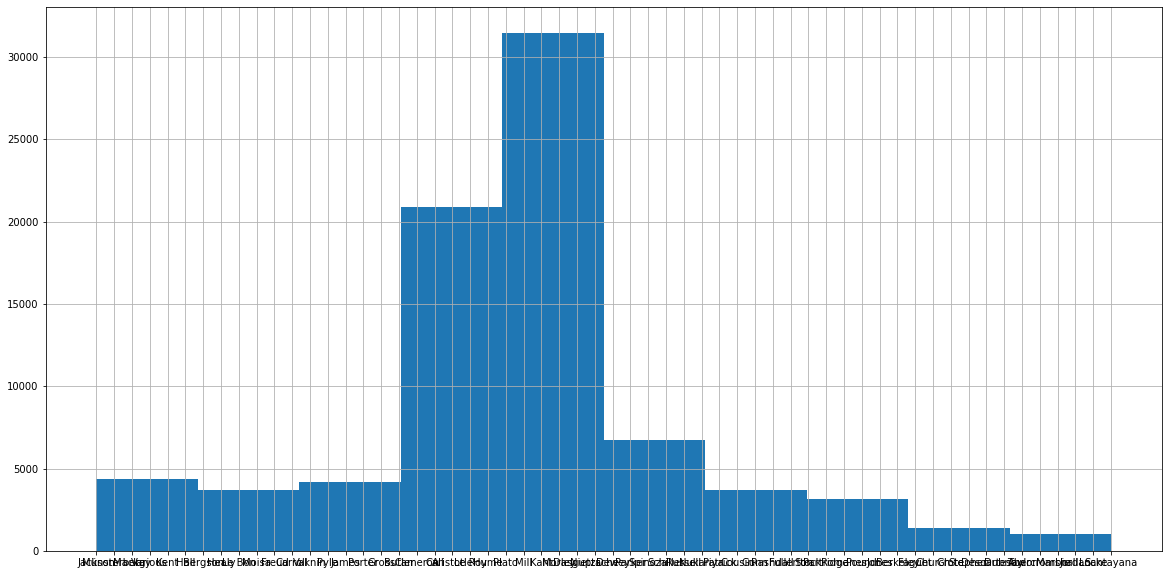

In [7]:
corpus.corpus_df['author'].hist(figsize=(20,10))


In [8]:
sentences = corpus.corpus_df.sentence.values
labels = corpus.corpus_df.labels.values

In [9]:
print(corpus.corpus_df['author'].unique()), 
le.transform(corpus.corpus_df['author'].unique())

['Jackson' 'Münsterberg' 'Mackay' 'Various' 'Kent' 'Hall' 'Bergson'
 'Healy' 'Le Bon' 'Moisa' 'Freud' 'Carroll' 'Vaknin' 'Pyle' 'James'
 'Porter' 'Gross' 'Butler' 'Cameron' 'Call' 'Aristotle' 'Le Roy' 'Hume'
 'Plato' 'Mill' 'Kant' 'Morley' 'Dasgupta' 'Nietzsche' 'Dewey' 'Parker'
 'Spinoza' 'Schiller' 'Russell' 'Nukariya' 'Patrick' 'Cousin' 'Gunn'
 'Rashdall' 'Fullerton' 'Stock' 'Partridge' 'Romanes' 'Pound' 'Jones'
 'Berkeley' 'Faguet' 'Church' 'Grote' 'Stephen' 'Descartes' 'Dubnow'
 'Taylor' 'Abercrombie' 'Marshall' 'Jordan' 'Locke' 'Santayana']


array([23, 37, 32, 57, 28, 20,  2, 21, 29, 35, 15,  7, 56, 46, 24, 44, 17,
        4,  6,  5,  1, 30, 22, 43, 34, 27, 36, 10, 38, 12, 40, 52, 51, 49,
       39, 42,  9, 19, 47, 16, 54, 41, 48, 45, 25,  3, 14,  8, 18, 53, 11,
       13, 55,  0, 33, 26, 31, 50])

In [10]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


/home/bettyld/PJ/Documents/NLP_PJ/env/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:115.)
  return torch._C._cuda_getDeviceCount() > 0


we need to use the tokenizer of the model
We consider ``sentence`` (x) and ``author`` (y).

To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT–the below cell will download this for us.
 https://mccormickml.com/2019/07/22/BERT-fine-tuning/

In [11]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
model_name = 'sentence-transformers/paraphrase-mpnet-base-v2'

print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=True)

Loading BERT tokenizer...


In [12]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  For every little boy the father gets in the way
Tokenized:  ['for', 'every', 'little', 'boy', 'the', 'father', 'gets', 'in', 'the', 'way']
Token IDs:  [2009, 2300, 2214, 2883, 2000, 2273, 4156, 2003, 2000, 2130]


In [13]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len) # let's take 

Max sentence length:  74


In [14]:
import torch

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/bettyld/PJ/Documents/NLP_PJ/env/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2126: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  For every little boy the father gets in the way
Token IDs: tensor([   0, 2009, 2300, 2214, 2883, 2000, 2273, 4156, 2003, 2000, 2130,    2,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1])


In [15]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

72,496 training samples
8,056 validation samples


In [16]:
print('elt 0 input id: \n', train_dataset[0][0])
print('elt 0 attention mask: \n', train_dataset[0][1])
print('elt 0 label: \n', train_dataset[0][2])


elt 0 input id: 
 tensor([   0, 2005, 3348, 2050, 2030, 2164, 4569, 2003, 1041, 8772,    2,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1])
elt 0 attention mask: 
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
elt 0 label: 
 tensor(23)


In [17]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [18]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    model_name, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = len(le.classes_), # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

if device == 'cuda':
    print('model on GPU cuda')
    model.cuda()

You are using a model of type mpnet to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at sentence-transformers/paraphrase-mpnet-base-v2 were not used when initializing BertForSequenceClassification: ['encoder.layer.9.attention.attn.v.bias', 'encoder.layer.6.attention.LayerNorm.bias', 'encoder.layer.0.attention.attn.v.weight', 'encoder.layer.8.attention.attn.k.bias', 'encoder.layer.8.attention.attn.o.weight', 'encoder.layer.10.attention.LayerNorm.weight', 'encoder.layer.5.attention.LayerNorm.bias', 'encoder.layer.7.attention.LayerNorm.bias', 'encoder.layer.7.attention.attn.v.bias', 'encoder.layer.4.attention.attn.q.bias', 'encoder.layer.4.attention.attn.q.weight', 'encoder.layer.0.attention.attn.o.weight', 'encoder.layer.7.attention.attn.o.bias', 'encoder.layer.4.attention.attn.v.weight', 'encoder.layer.7.attention.attn.k.bias', 'encoder.layer.1.attention.attn.v.bias', 'encoder.layer.2.a

We can see that model has .bert  parameters and .classifier parameters. If we wanted, we could freeze some layers
```for param in model.bert.parameters():
    param.requires_grad = False
```
   
We also could select only high level parameters:
```for param in model.bert.parameters():
    print(param)
    param.requires_grad = False
```

In [19]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30527, 768)
bert.embeddings.position_embeddings.weight                (514, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [20]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [21]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [22]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [23]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [24]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
print(device)
model.cuda()
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

activation = torch.nn.Softmax(dim=1)

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        
        # Progress update every 100 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the lorequires_gradss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
#         print('DEBUG', len(b_input_ids, b_inputs_ids.shape))
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        loss = output.loss
#         logits = output.logits
#         logits = torch.max(activation(logits), axis=1).indices

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    eval_labels, eval_logits = [], []
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
                
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            output = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        logits = output.logits
        logits = torch.max(activation(logits), axis=1).indices

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += np.sum(logits == label_ids) / len(label_ids)
        eval_labels.extend(label_ids)
        eval_logits.extend(logits)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

cpu


RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = eval_labels
y_pred = eval_logits

mat = confusion_matrix(y_true, y_pred)
mat

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(mat, annot=True)


# Test data

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

In [ ]:
# Save the model

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save_philo_psycho_epoch_2/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


In [ ]:
# open after saving

In [ ]:
tokenizer_finetune = BertTokenizer.from_pretrained(output_dir)
model_finetune = BertForSequenceClassification.from_pretrained(output_dir, output_hidden_states=True)
model_finetune.eval()

In [ ]:
trial_sentence = 'I want to eat some ice-cream'
encoded_dict = tokenizer_finetune.encode_plus(
                        trial_sentence,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
with torch.no_grad():
    output = model_finetune(encoded_dict['input_ids'], encoded_dict['attention_mask'])
    hidden_states = output.hidden_states
    cls_hidden_state = hidden_states[-1][:, 0, :] # the first hidden state in last layer
    print(cls_hidden_state.shape)
    print(output.logits.shape)
print(cls_hidden_state)

In [ ]:
from transformers import pipeline, BertConfig, BertModel

pipeline_tune = pipeline('feature-extraction', model=model_finetune, tokenizer=tokenizer_finetune)
np.array(pipeline_tune(trial_sentence))[0][0]
# np.array(pipeline(trial_sentence))

In [ ]:
tokenizer_finetune = BertTokenizer.from_pretrained(output_dir)
model_finetune = BertModel.from_pretrained(output_dir)

pipeline_tune = pipeline('feature-extraction', model=model_finetune, tokenizer=tokenizer_finetune)
pipeline_tune(trial_sentence)
# np.array(pipeline(trial_sentence))